In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

OUTPUTS_DIR = "outputs"
DOMAINS = ["general", "medical", "legal", "finance"]
sns.set(style="whitegrid")

In [3]:
import os
os.getcwd()

'/Users/raaed/Desktop/hallucination_project/phase_1_evaluation/notebooks'

In [4]:
import os
os.chdir("..")

In [5]:
os.getcwd()
print(os.listdir("outputs"))

['medical_evaluated.csv', 'finance_evaluated.csv', 'factcheck_cache.json', 'general_evaluated.csv', 'legal_evaluated.csv']


In [6]:
evaluated_data = {}

for domain in DOMAINS:
    path = os.path.join(OUTPUTS_DIR, f"{domain}_evaluated.csv")
    df = pd.read_csv(path)
    evaluated_data[domain] = df
    print(f"{domain.title()} Domain Loaded: {len(df)} samples")

General Domain Loaded: 572 samples
Medical Domain Loaded: 99 samples
Legal Domain Loaded: 74 samples
Finance Domain Loaded: 45 samples


### Summary Stats (.describe) for Each Domain

In [7]:
for domain, df in evaluated_data.items():
    print(f"\n--- {domain.upper()} ---")
    display(df[["fuzzy_score", "embedding_score"]].describe(percentiles=[.25, .5, .75]))


--- GENERAL ---


,fuzzy_score,embedding_score
count,572.000000,572.000000
mean,26.276550,0.663461
std,16.417235,0.237698
min,1.709402,-0.064538
25%,16.180056,0.617212
50%,22.497580,0.737810
75%,30.285266,0.819983
max,98.850575,0.993783



--- MEDICAL ---


,fuzzy_score,embedding_score
count,99.000000,99.000000
mean,22.713238,0.692362
std,9.381226,0.186540
min,6.490872,0.067711
25%,16.860934,0.615145
50%,21.561338,0.763764
75%,25.847379,0.820163
max,60.317460,0.953091



--- LEGAL ---


,fuzzy_score,embedding_score
count,74.000000,74.000000
mean,19.233260,0.704340
std,8.690048,0.214096
min,4.156479,-0.021422
25%,13.396438,0.681388
50%,18.038825,0.787768
75%,23.570914,0.834035
max,55.172414,0.947800



--- FINANCE ---


,fuzzy_score,embedding_score
count,45.000000,45.000000
mean,22.646527,0.731028
std,13.547317,0.134173
min,9.785203,0.427721
25%,14.801444,0.641421
50%,18.816388,0.745346
75%,25.126904,0.843450
max,68.525896,0.925491


### Distribution Plots of Fuzzy + Embedding Scores

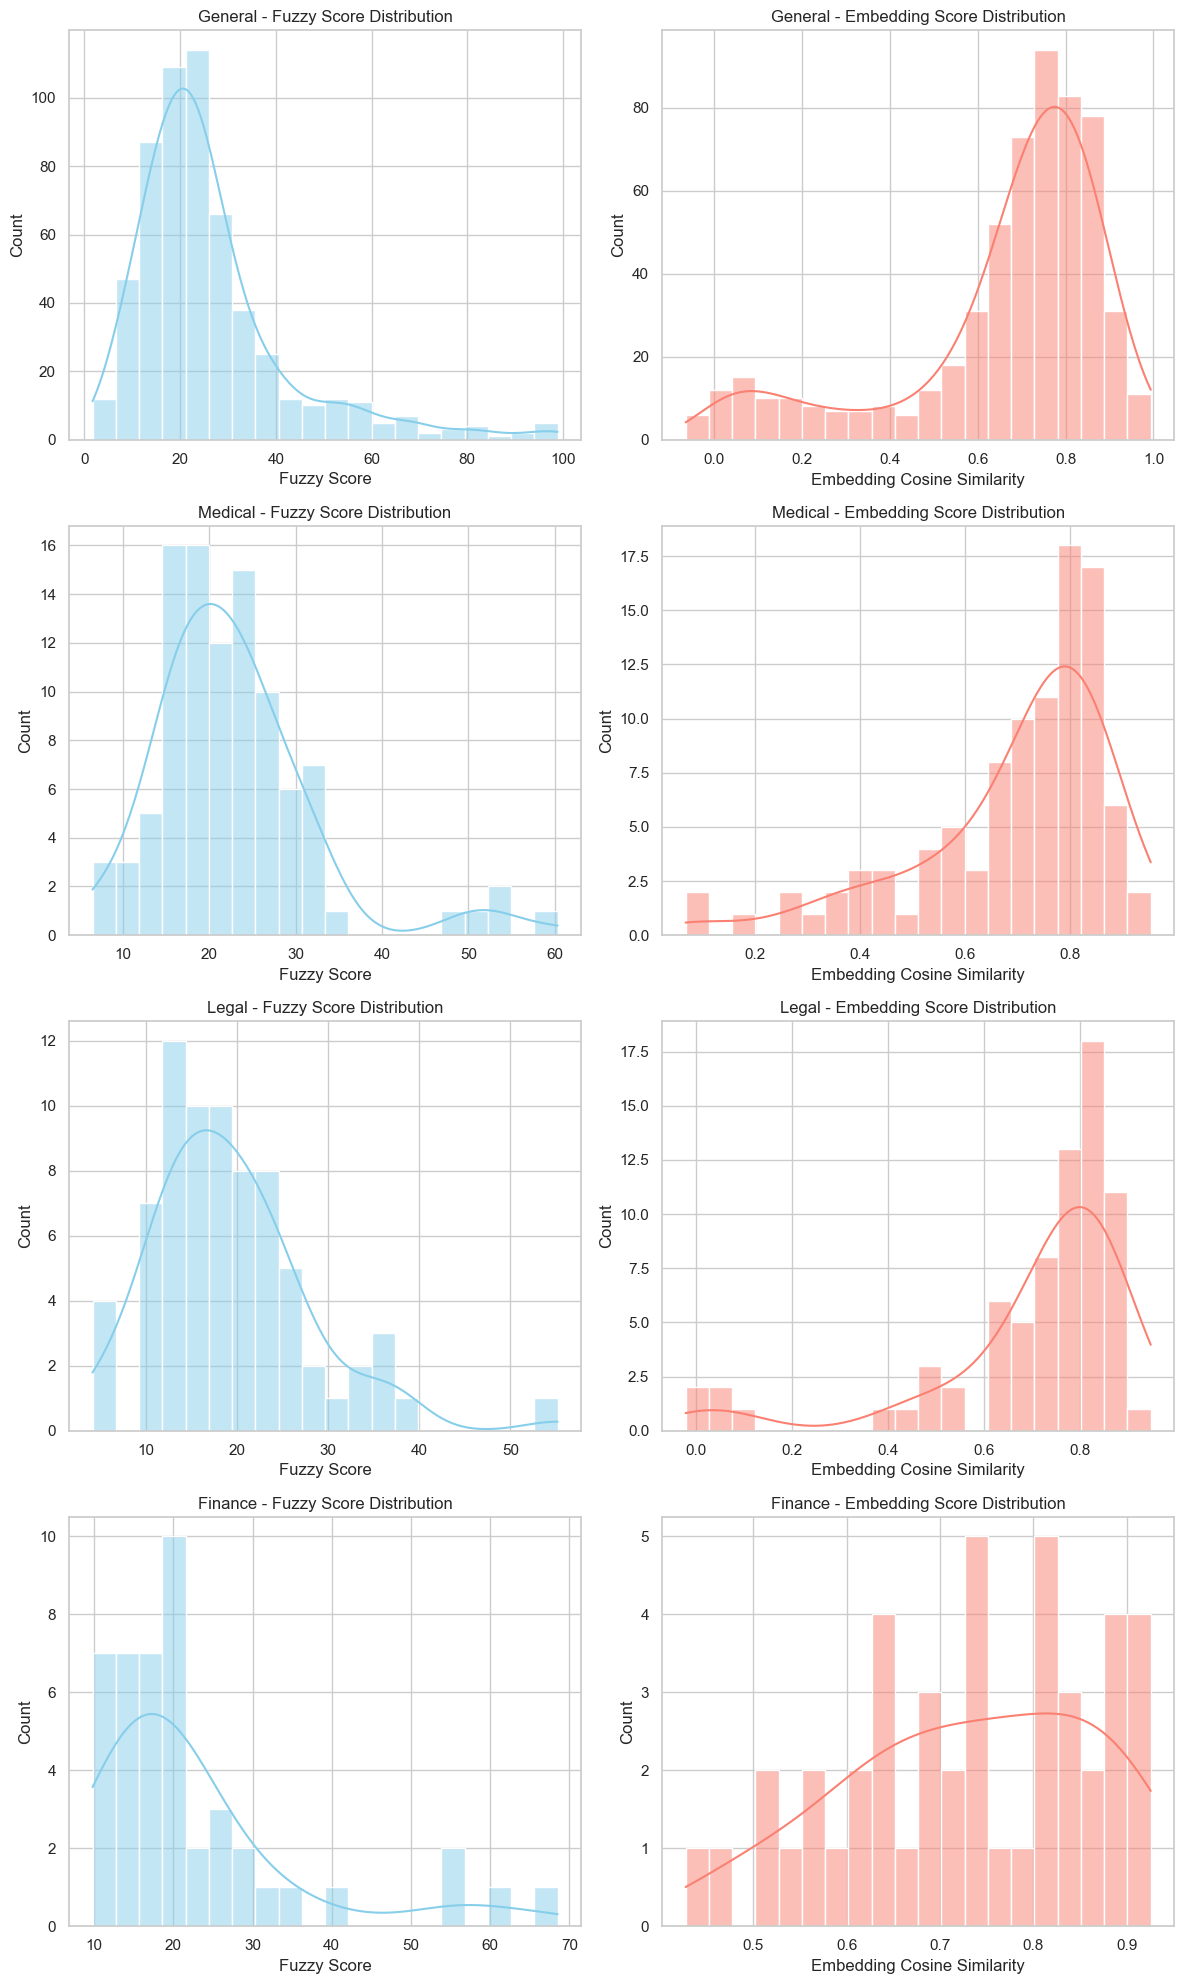

Saved combined figure to: notebooks/visualizations/score_distributions_by_domain.png


In [11]:
vis_dir = os.path.join("notebooks", "visualizations")
os.makedirs(vis_dir, exist_ok=True)  # Ensure folder exists
out_path = os.path.join(vis_dir, "score_distributions_by_domain.png")

n_domains = len(evaluated_data)
fig, axes = plt.subplots(n_domains, 2, figsize=(12, 5 * n_domains), squeeze=False)

for i, (domain, df) in enumerate(evaluated_data.items()):
    # Fuzzy score
    sns.histplot(df["fuzzy_score"], bins=20, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"{domain.title()} - Fuzzy Score Distribution")
    axes[i, 0].set_xlabel("Fuzzy Score")

    # Embedding score
    sns.histplot(df["embedding_score"], bins=20, kde=True, ax=axes[i, 1], color="salmon")
    axes[i, 1].set_title(f"{domain.title()} - Embedding Score Distribution")
    axes[i, 1].set_xlabel("Embedding Cosine Similarity")

plt.tight_layout()
plt.savefig(out_path, dpi=300)
plt.show()

print(f"Saved combined figure to: {out_path}")

#### General

In [18]:
general = pd.read_csv('outputs/general_evaluated.csv')
for fuzzy_thresh, embedding_thresh in [(14, 0.60), (16, 0.62), (18, 0.65)]:
    general['combined_hallucination'] = (general['fuzzy_score'] < fuzzy_thresh) | (general['embedding_score'] < embedding_thresh)
    count = general['combined_hallucination'].sum()
    print(f"Fuzzy < {fuzzy_thresh} | Embed < {embedding_thresh} => {count}/{len(general)} hallucinations ({count/len(general)*100:.1f}%)")

Fuzzy < 14 | Embed < 0.6 => 173/572 hallucinations (30.2%)
Fuzzy < 16 | Embed < 0.62 => 210/572 hallucinations (36.7%)
Fuzzy < 18 | Embed < 0.65 => 258/572 hallucinations (45.1%)


#### Medical

In [19]:
medical = pd.read_csv('outputs/medical_evaluated.csv')
for fuzzy_thresh, embedding_thresh in [(14, 0.60), (16, 0.62), (18, 0.66)]:
    medical['combined_hallucination'] = (medical['fuzzy_score'] < fuzzy_thresh) | (medical['embedding_score'] < embedding_thresh)
    count = medical['combined_hallucination'].sum()
    print(f"[MEDICAL] Fuzzy < {fuzzy_thresh} | Embed < {embedding_thresh} => {count}/{len(medical)} hallucinations ({count/len(medical)*100:.1f}%)")

[MEDICAL] Fuzzy < 14 | Embed < 0.6 => 29/99 hallucinations (29.3%)
[MEDICAL] Fuzzy < 16 | Embed < 0.62 => 34/99 hallucinations (34.3%)
[MEDICAL] Fuzzy < 18 | Embed < 0.66 => 44/99 hallucinations (44.4%)


#### Legal

In [20]:
legal = pd.read_csv('outputs/legal_evaluated.csv')
for fuzzy_thresh, embedding_thresh in [(12, 0.65), (14, 0.67), (16, 0.70)]:
    legal['combined_hallucination'] = (legal['fuzzy_score'] < fuzzy_thresh) | (legal['embedding_score'] < embedding_thresh)
    count = legal['combined_hallucination'].sum()
    print(f"[LEGAL] Fuzzy < {fuzzy_thresh} | Embed < {embedding_thresh} => {count}/{len(legal)} hallucinations ({count/len(legal)*100:.1f}%)")

[LEGAL] Fuzzy < 12 | Embed < 0.65 => 21/74 hallucinations (28.4%)
[LEGAL] Fuzzy < 14 | Embed < 0.67 => 32/74 hallucinations (43.2%)
[LEGAL] Fuzzy < 16 | Embed < 0.7 => 40/74 hallucinations (54.1%)


#### Fianance

In [21]:
finance = pd.read_csv('outputs/finance_evaluated.csv')
for fuzzy_thresh, embedding_thresh in [(14, 0.64), (16, 0.66), (18, 0.69)]:
    finance['combined_hallucination'] = (finance['fuzzy_score'] < fuzzy_thresh) | (finance['embedding_score'] < embedding_thresh)
    count = finance['combined_hallucination'].sum()
    print(f"[FINANCE] Fuzzy < {fuzzy_thresh} | Embed < {embedding_thresh} => {count}/{len(finance)} hallucinations ({count/len(finance)*100:.1f}%)")

[FINANCE] Fuzzy < 14 | Embed < 0.64 => 18/45 hallucinations (40.0%)
[FINANCE] Fuzzy < 16 | Embed < 0.66 => 23/45 hallucinations (51.1%)
[FINANCE] Fuzzy < 18 | Embed < 0.69 => 28/45 hallucinations (62.2%)
